<a href="https://colab.research.google.com/github/binodrizal/DSIC401/blob/main/hw4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib as plt  
import seaborn as sns

data source  

In [ ]:
from typing_extensions import dataclass_transform
url="https://raw.githubusercontent.com/gjm112/DSCI401/main/data/HELPrct.csv"
data=pd.read_csv(url)



Solution of 1a:

In [ ]:
mean_data = data.mean(axis=0,numeric_only=True,skipna=True)
mean_data

age                  35.653422
anysubstatus          0.772358
cesd                 32.847682
d1                    3.059603
daysanysub           75.307377
dayslink            255.605568
drugrisk              1.887168
e2b                   2.504673
female                0.236203
i1                   17.907285
i2                   24.547461
id                  233.401766
indtot               35.728477
linkstatus            0.378190
mcs                  31.676678
pcs                  48.048542
pss_fr                6.706402
sexrisk               4.642384
avg_drinks           17.907285
max_drinks           24.547461
hospitalizations      3.059603
dtype: float64

Solution of 1 b: 


In [ ]:

def age_group(age):
  if 50<age<=60:
    return "50-60"
  elif 40<=age<=50:
    return "40-50"
  elif 30<=age<40:
    return "30-40"
  elif 20<=age<30:
    return "20-30"
  elif 10<=age<20:
    return "10-20"
  elif age<10:
    return "0-10"

data["age_group"]=data["age"].map(lambda x:age_group(x))



In [ ]:
def mean_group(a_group):
  out=data[data.age_group==a_group].groupby(["age_group","sex"]).mean(numeric_only=True)
  return(out)

In [ ]:
from pickle import TRUE
c=data[["age","age_group"]].groupby(age_group).count().reset_index()
group_name=(c.iloc[:,0]).reset_index(drop=TRUE)
group_name


0     0-10
1    10-20
2    20-30
3    30-40
4    40-50
5    50-60
Name: index, dtype: object

In [ ]:
data_list=list(map(mean_group, group_name))
data_list
df1 = pd.DataFrame(data_list[1])
df2=pd.DataFrame(data_list[2])
df3=pd.DataFrame(data_list[3])
df4=pd.DataFrame(data_list[4])
df5=pd.DataFrame(data_list[5])
dfs=[df1,df2,df3,df4,df5]
data_1b=pd.concat(dfs).round(1).reset_index()
data_1b


,age_group,sex,age,anysubstatus,cesd,d1,daysanysub,dayslink,drugrisk,e2b,...,id,indtot,linkstatus,mcs,pcs,pss_fr,sexrisk,avg_drinks,max_drinks,hospitalizations
0,10-20,male,19.0,NaN,40.0,1.0,NaN,63.0,0.0,8.0,...,232.0,40.0,1.0,30.3,41.1,4.0,2.0,27.0,30.0,1.0
1,20-30,female,26.3,0.8,40.3,1.9,64.5,317.7,2.7,2.8,...,186.6,34.4,0.2,24.7,46.9,6.7,6.4,6.1,9.9,1.9
2,20-30,male,26.0,0.8,32.9,1.9,77.1,279.3,2.9,2.2,...,235.1,36.2,0.3,31.1,51.8,5.9,4.4,12.4,18.3,1.9
3,30-40,female,34.3,0.8,35.5,3.6,86.9,270.0,1.6,1.7,...,258.9,32.1,0.3,29.6,45.5,7.4,5.4,15.5,19.0,3.6
4,30-40,male,34.6,0.8,30.3,2.6,75.7,242.0,1.4,2.5,...,232.3,36.7,0.4,33.2,49.4,6.6,4.7,19.0,26.6,2.6
5,40-50,female,44.9,0.6,37.3,4.3,91.6,241.7,1.5,2.1,...,201.3,31.9,0.4,30.9,43.6,7.0,4.2,20.3,30.3,4.3
6,40-50,male,43.8,0.8,32.5,4.2,67.8,243.9,2.2,3.1,...,241.1,37.2,0.4,32.1,47.3,7.0,4.3,21.9,29.5,4.2
7,50-60,female,56.7,0.7,39.3,3.0,77.0,261.7,0.0,1.5,...,152.3,29.3,0.3,24.5,36.6,8.7,0.7,8.7,9.0,3.0
8,50-60,male,55.4,0.8,34.3,6.3,45.0,262.3,1.7,3.1,...,225.0,38.7,0.4,35.7,37.5,7.3,4.0,36.4,42.2,6.3


In [ ]:
c=list(data_1b.columns)
del c[0:3]


In [ ]:
data_1c=pd.melt(data_1b, id_vars=["age_group","sex","age"], value_vars=c)
data_1c

,age_group,sex,age,variable,value
0,10-20,male,19.0,anysubstatus,NaN
1,20-30,female,26.3,anysubstatus,0.8
2,20-30,male,26.0,anysubstatus,0.8
3,30-40,female,34.3,anysubstatus,0.8
4,30-40,male,34.6,anysubstatus,0.8
...,...,...,...,...,...
175,30-40,male,34.6,hospitalizations,2.6
176,40-50,female,44.9,hospitalizations,4.3
177,40-50,male,43.8,hospitalizations,4.2
178,50-60,female,56.7,hospitalizations,3.0


g = sns.FacetGrid(tips, col="time", hue="sex")
g.map_dataframe(sns.scatterplot, x="total_bill", y="tip")
g.add_legend()

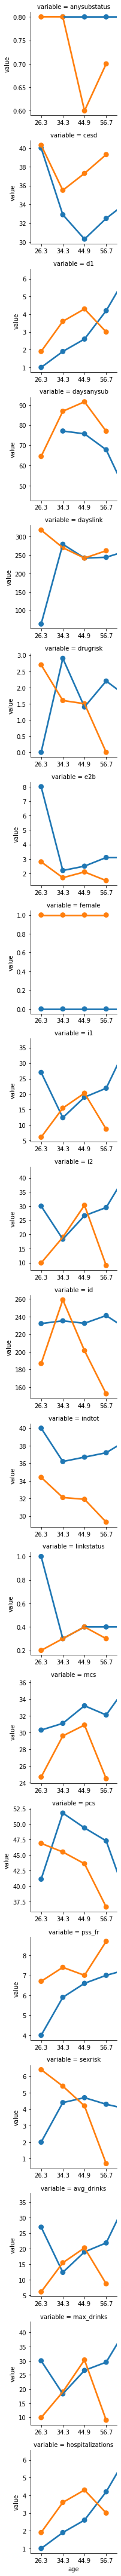

In [ ]:

g=sns.FacetGrid(data_1c, row="variable",hue="sex",sharey=False, sharex=False)
g.map_dataframe(sns.pointplot, x="age",y="value").set_titles(col_template="{col_name}")